# **SPAM DETECTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
data  = pd.read_csv("/content/SMSSpamCollection.tsv", sep="\t", names=["label", "body_text"], header=None)
data.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
texts = []
labels = []
for i, label in enumerate(data['label']):
    texts.append(data['body_text'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


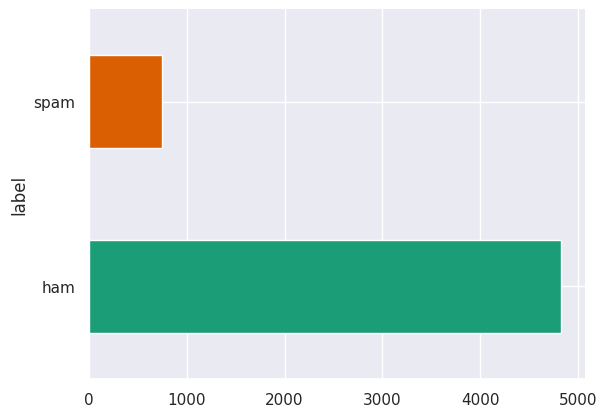

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# number of words used as features
max_features = 10000 #word/vocab
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

True
The number of training 4457, validation 1115 


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

Found 9009 unique words: 


In [ ]:
data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

data shape:  (5572, 500)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 14s 187ms/step - loss: 0.2799 - acc: 0.9066 - val_loss: 0.1246 - val_acc: 0.9675
Epoch 2/10
60/60 [==============================] - 7s 122ms/step - loss: 0.1045 - acc: 0.9708 - val_loss: 0.0781 - val_acc: 0.9787
Epoch 3/10
60/60 [==============================] - 9s 150ms/step - loss: 0.1068 - acc: 0.9661 - val_loss: 0.1599 - val_acc: 0.9507
Epoch 4/10
60/60 [==============================] - 9s 149ms/step - loss: 0.0604 - acc: 0.9823 - val_loss: 0.0675 - val_acc: 0.9843
Epoch 5/10
60/60 [==============================] - 7s 124ms/step - loss: 0.0436 - acc: 0.9882 - val_loss: 0.0652 - val_acc: 0.9798
Epoch 6/10
60/60 [==============================] - 9s 147ms/step - loss: 0.0415 - acc: 0.9877 - val_loss: 0.1141 - val_acc: 0.9619
Epoch 7/10
60/60 [==============================] - 8s 140ms/step - loss: 0.0191 - acc: 0.9952 - val_loss: 0.0982 - val_acc: 0.9697
Epoch 8/10
60/60 [==============================] - 7s 119ms/step - loss: 0

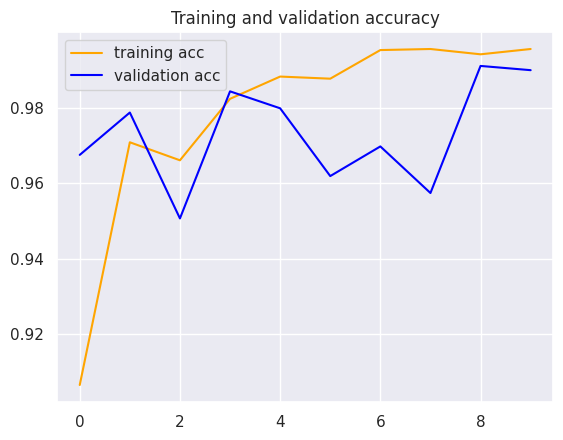

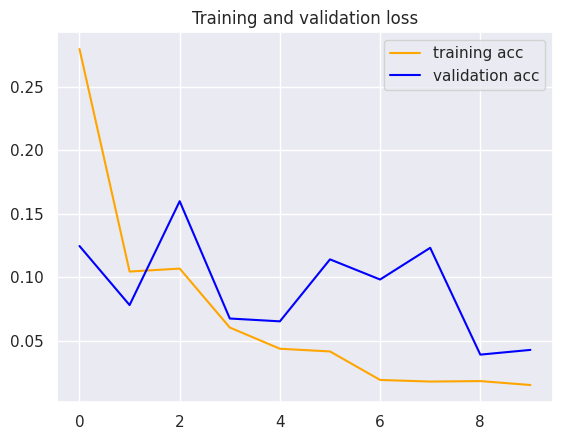

In [ ]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(texts_test)
pred = pred.flatten()
print(pred.round(2))

acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict(texts_test)

35/35 [==============================] - 2s 52ms/step
[0. 0. 0. ... 0. 0. 0.]
35/35 [==============================] - 2s 70ms/step


In [ ]:
y_pred = np.where(pred > 0.5, 1, 0)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))


Test loss is 0.07 accuracy is 0.98  


In [ ]:
print(confusion_matrix(y_pred, y_test))

[[957  18]
 [  4 136]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       961
           1       0.97      0.88      0.93       154

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# **LSTM**

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 18s 261ms/step - loss: 0.3457 - acc: 0.8701 - val_loss: 0.2004 - val_acc: 0.9630
Epoch 2/10
60/60 [==============================] - 19s 317ms/step - loss: 0.1224 - acc: 0.9700 - val_loss: 0.0841 - val_acc: 0.9765
Epoch 3/10
60/60 [==============================] - 22s 372ms/step - loss: 0.0622 - acc: 0.9843 - val_loss: 0.0569 - val_acc: 0.9865
Epoch 4/10
60/60 [==============================] - 18s 305ms/step - loss: 0.0385 - acc: 0.9907 - val_loss: 0.0426 - val_acc: 0.9877
Epoch 5/10
60/60 [==============================] - 15s 253ms/step - loss: 0.0291 - acc: 0.9927 - val_loss: 0.0442 - val_acc: 0.9888
Epoch 6/10
60/60 [==============================] - 15s 255ms/step - loss: 0.0207 - acc: 0.9947 - val_loss: 0.0422 - val_acc: 0.9888
Epoch 7/10
60/60 [==============================] - 15s 255ms/step - loss: 0.0155 - acc: 0.9969 - val_loss: 0.0459 - val_acc: 0.9888
Epoch 8/10
60/60 [==============================] - 15s 254ms/step - 

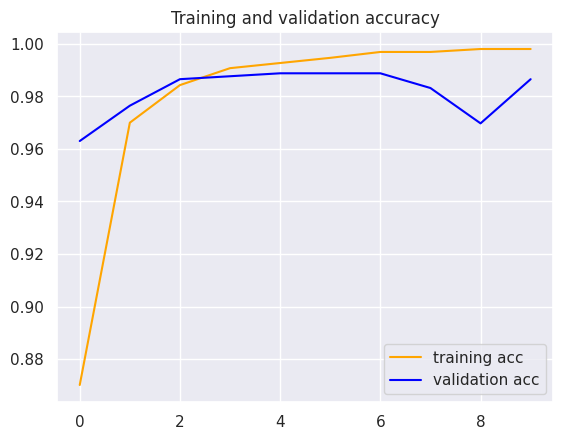

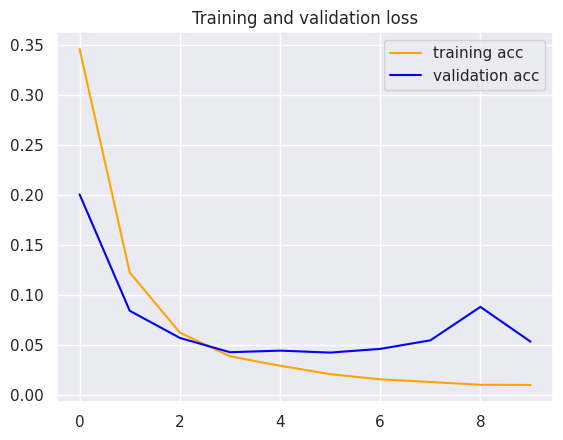

In [ ]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = model.predict(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

35/35 [==============================] - 1s 41ms/step
Test loss is 0.07 accuracy is 0.98  


In [ ]:
y_pred = np.where(pred > 0.5, 1, 0)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
print(confusion_matrix(y_pred, y_test))

[[954  13]
 [  7 141]]


In [ ]:
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

Test loss is 0.07 accuracy is 0.98  


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       961
           1       0.95      0.92      0.93       154

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

